# Parte 1

# 0. Librerías básicas

Importando librería báscias en esta Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## 1. Abrir una imagen

### 1.1 "Hola mundo" (Método oficial)

Al ejecutar esta celda se abre un ventana externa, es necesario cerrar esa ventana para continuar la ejecución de las siguientes celdas

In [2]:
img = cv.imread("figuras/giza.jpg")
cv.imshow("Imagen de piramides de Giza", img)
cv.waitKey()
cv.destroyAllWindows()

### 1.2 "Hola mundo" (Recomendado para openCV en Jupyter)

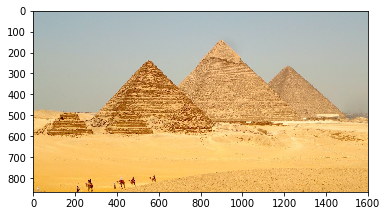

In [3]:
img = cv.imread("figuras/giza.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Mostrando datos de la imagen

In [4]:
img = cv.imread("figuras/giza.jpg")
print("Función shape", img.shape)
print("alto: ", img.shape[0], " pixeles")
print("ancho: ", img.shape[1], " pixeles")
print("canales: ", img.shape[2])

Función shape (866, 1600, 3)
alto:  866  pixeles
ancho:  1600  pixeles
canales:  3


## 2. Conversión a escala de grises en openCV

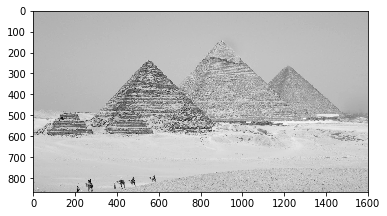

In [5]:
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()

Agregando rejilla y barra de color

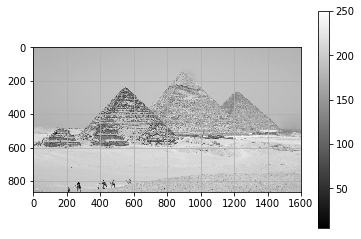

In [6]:
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.colorbar()
plt.grid()
plt.show()

Mostrando propiedades

In [7]:
print("Función shape", img_gray.shape)
print("alto: ", img_gray.shape[0], " pixeles")
print("ancho: ", img_gray.shape[1], " pixeles")

Función shape (866, 1600)
alto:  866  pixeles
ancho:  1600  pixeles


## 3. Modificando partes de una imagen

In [8]:
print("Valor del pixel en la fila 0, columna 0 es: ", img_gray[0,0])
print("Valor del pixel en la fila 70, columna 250 es: ", img_gray[70, 250])

Valor del pixel en la fila 0, columna 0 es:  172
Valor del pixel en la fila 70, columna 250 es:  180


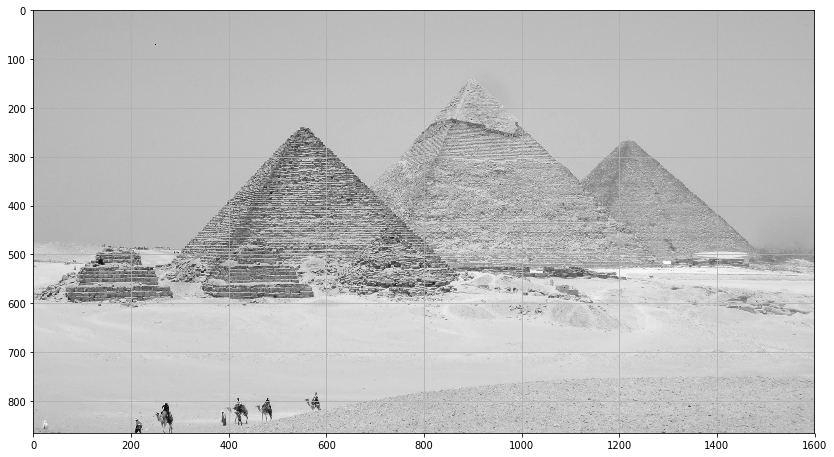

In [9]:
plt.figure(figsize=(14,14))
img_gray[0,0] = 0
img_gray[70, 250] = 0
plt.imshow(img_gray, cmap="gray")
plt.grid()
plt.show()

[]

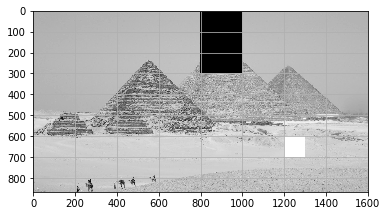

In [10]:
img_gray[0:300, 800:1000] = 0
img_gray[600:700, 1200:1300] = 255
plt.imshow(img_gray, cmap="gray")
plt.grid()
plt.plot()

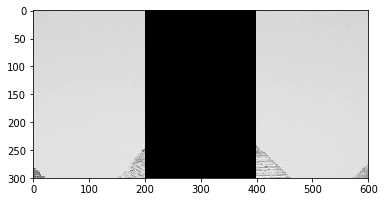

In [11]:
corner = img_gray[0:300, 600:1200]
plt.imshow(corner, cmap="gray")
plt.show()

Cargando nuevamente la imagen

[]

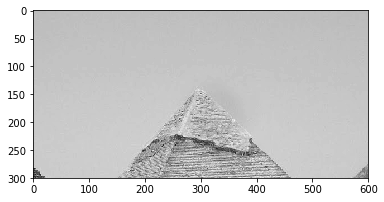

In [12]:
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
corner = img_gray[0:300, 600:1200]
plt.imshow(corner,cmap="gray")
plt.plot()

## 4. Filtros

Aplicando el filtro de media

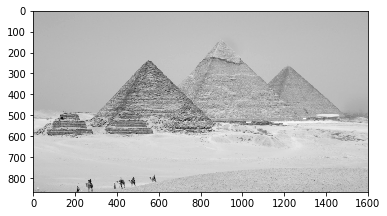

In [13]:
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_fmedia = cv.blur(img_gray, (3,3))
plt.imshow(img_fmedia, cmap="gray")
plt.show()

Aplicando filtro de mediana

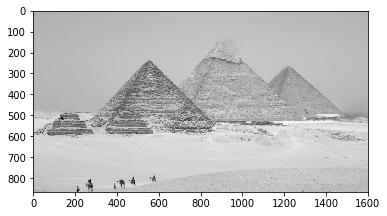

In [14]:
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_fmediana = cv.medianBlur(img_gray, 3)
plt.imshow(img_fmediana, cmap="gray")
plt.show()

Aplicando filtro Gaussiano

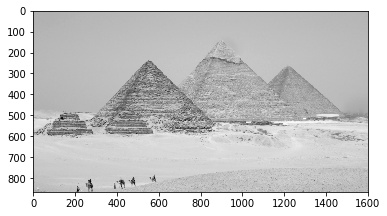

In [15]:
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gauss = cv.GaussianBlur(img_gray, (3,3),0)
plt.imshow(img_gauss, cmap="gray")
plt.show()

## 5. Thresholding

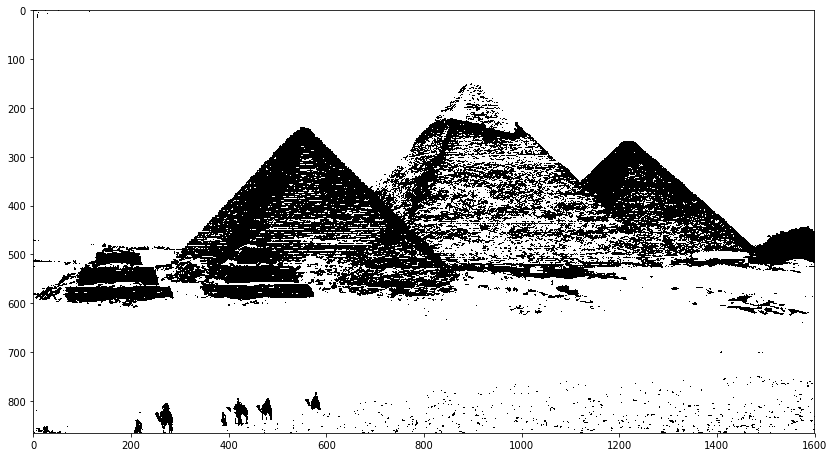

In [16]:
plt.figure(figsize=(14,14))
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gauss = cv.GaussianBlur(img_gray, (3, 3), 0)
thr, img_thr = cv.threshold(img_gauss, 172, 255, cv.THRESH_BINARY)
plt.imshow(img_thr,cmap="gray")
plt.show()

## 6. Resize o cambio de tamaño

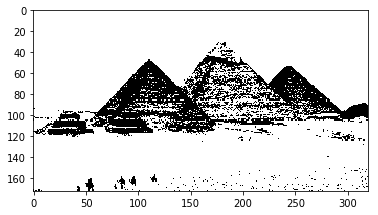

In [17]:
img = cv.imread("figuras/giza.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gauss = cv.GaussianBlur(img_gray, (3,3), 0)
thr, img_thr = cv.threshold(img_gauss, 172, 255, cv.THRESH_BINARY)
alto = img.shape[0]
ancho = img.shape[1]
ratio = 0.2
img_r = cv.resize(img_thr, (int(ancho*ratio),int(alto*ratio)), interpolation=cv.INTER_NEAREST)
plt.imshow(img_r, cmap="gray")
plt.show()

## 7. Todas las operaciones

Procesamiento de imagen

In [18]:
img = cv.imread("figuras/giza.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_gauss = cv.GaussianBlur(img_gray,(3,3),0)
thr, img_thr = cv.threshold(img_gauss, 172, 255, cv.THRESH_BINARY)
alto = img.shape[0]
ancho = img.shape[1]
ratio = 0.2
img_r = cv.resize(img_thr, (int(ancho*ratio), int(alto*ratio)), interpolation = cv.INTER_NEAREST)

Mostrar los resultados del procesamiento

[]

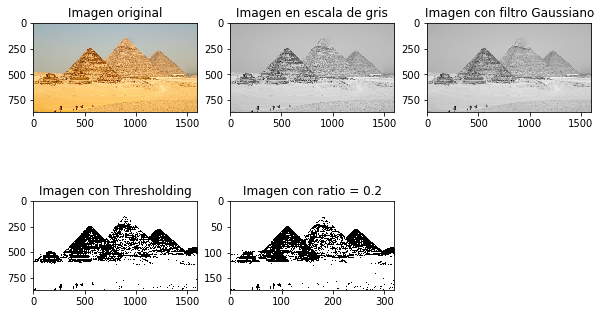

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Imagen original")
plt.subplot(2,3,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Imagen en escala de gris")
plt.subplot(2,3,3)
plt.imshow(img_gauss, cmap="gray")
plt.title("Imagen con filtro Gaussiano")
plt.subplot(2,3,4)
plt.imshow(img_thr, cmap="gray")
plt.title("Imagen con Thresholding")
plt.subplot(2,3,5)
plt.imshow(img_r, cmap="gray")
plt.title("Imagen con ratio = 0.2")
plt.plot()